##### 공공데이터 포털에서 "전국 신규 민간 아파트 분양가격 동향" 데이터를 다운받아 분석한다. 
###### https://www.data.go.kr/dataset/3035522/fileData.do 
###### 2020.2월 현재 가장 최신 데이터는 2015.10 ~ 2019.12월 분

In [1]:
## don't show warning message 
import warnings
warnings.filterwarnings("ignore")

In [3]:
## 필요한 패키지들 블러오기 & 그래픽 옵션 세팅 
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(style='darkgrid')

In [4]:
## 국내데이터 이므로 한글폰트 사용가능하도록 세팅
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (14,4)
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
## load data 
pre_sales = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',
                       encoding='euc-kr')  ## 주의: 공공포털의 데이터 포맷은 UTF-8이 아닌 euc-kr이다. 

print(pre_sales.shape)
pre_sales.head()

(4335, 5)


,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [8]:
pre_sales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null int64
월          4335 non-null int64
분양가격(㎡)    4058 non-null object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


###### <span style="color:blue"> 원본 데이터 확인결과 다음의 문제점들을 발견함 </span>
###### <span style="color:blue"> 1) 연도와 월을 정수타입으로 인식하고 있음 </span>
###### <span style="color:blue"> 2) 분양가격의 데이터 타입이 숫자형이 아님 </span>
###### <span style="color:blue"> 3) 분양가격에는 277개의 결측치가 존재함 </span>

In [11]:
## 연도와 월은 정수가 아닌 카테고리 형태의 숫자임 --> sring type으로 변경 
pre_sales['연도'] = pre_sales['연도'].astype(str)
pre_sales['월'] = pre_sales['월'].astype(str)

In [16]:
## 분양가격을 숫자타입으로 변경 
pre_sales['분양가격(㎡)'] = pd.to_numeric(pre_sales['분양가격(㎡)'], errors = 'coerce')

In [17]:
## 분양가격을 보다 친숙한 평당 분양가격으로 변경 (1평 = 3.3제곱미터)
pre_sales['평당분양가격'] = pre_sales['분양가격(㎡)']*3.3

In [18]:
pre_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null object
월          4335 non-null object
분양가격(㎡)    3957 non-null float64
평당분양가격     3957 non-null float64
dtypes: float64(2), object(4)
memory usage: 203.3+ KB


In [21]:
## 분양가격의 결측치 확인 
pre_sales.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    378
평당분양가격     378
dtype: int64

In [27]:
## 변수들의 기초 통계량 확인 (금액단위:천원)
## describe 함수는 기본적으로 숫자형 변수의 통계량만을 표시하지만, 
## include='all'옵션을 지정하면, 문자형/숫자형을 모두 요약한다. 
pre_sales.describe(include='all')

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
count,4335,4335,4335,4335,3957.000000,3957.000000
unique,17,5,5,12,NaN,NaN
top,충북,전용면적 85㎡초과 102㎡이하,2016,11,NaN,NaN
freq,255,867,1020,425,NaN,NaN
mean,NaN,NaN,NaN,NaN,3238.128633,10685.824488
std,NaN,NaN,NaN,NaN,1264.309933,4172.222780
min,NaN,NaN,NaN,NaN,1868.000000,6164.400000
25%,NaN,NaN,NaN,NaN,2441.000000,8055.300000
50%,NaN,NaN,NaN,NaN,2874.000000,9484.200000
75%,NaN,NaN,NaN,NaN,3561.000000,11751.300000


In [38]:
## 지역명, 규모구분 등 object 변수들에 대해 주로 어떤 것들이 있는지 살펴보자 
## value_counts() 함수가 유용하다. 
pre_sales['지역명'].value_counts()

충북    255
강원    255
대구    255
세종    255
서울    255
경기    255
부산    255
광주    255
대전    255
인천    255
전남    255
충남    255
경북    255
전북    255
울산    255
경남    255
제주    255
Name: 지역명, dtype: int64

In [37]:
pre_sales['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    867
전용면적 102㎡초과          867
전용면적 60㎡이하           867
전체                   867
전용면적 60㎡초과 85㎡이하     867
Name: 규모구분, dtype: int64

###### <span style="color:blue"> 평균을 구하기 위해 지역별, 규모별 같은수의 샘플을 수집한 듯 </span>

In [36]:
## 피봇테이블을 만들어, 규모별 연간 분양가 추이를 살펴보자 
## 문법은 : dataset.pivot_table('value', index='x_var', columns='y_var', margins=True/False )
pre_sales.pivot_table('평당분양가격', index='규모구분', columns='연도')

연도,2015,2016,2017,2018,2019
규모구분,,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,446","13,332"
전용면적 60㎡이하,"8,952","9,399","10,246","10,844","11,507"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,651","11,677"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,442","12,981"
전체,"8,893","9,293","9,901","10,676","11,603"


In [46]:
pre_sales.pivot_table('평당분양가격', index='지역명', columns='연도')

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,"7,188","7,163","7,274","8,219","8,934"
경기,"11,061","11,685","12,305","14,258","15,666"
경남,"8,459","8,497","8,787","9,328","10,698"
경북,"7,464","7,753","8,281","8,681","9,050"
광주,"7,917","9,191","9,614","9,527","12,112"
대구,"9,019","10,282","12,207","12,139","14,082"
대전,"8,191","8,911","9,957","10,234","12,619"
부산,"10,377","10,744","11,561","12,890","13,538"
서울,"20,316","21,753","21,831","23,202","28,287"


In [47]:
pre_sales.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,"5,841","19,275"


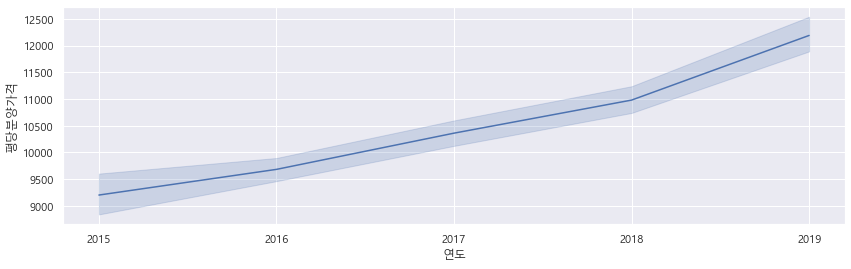

In [85]:
## Data Visualization: 0) 연도별 평당 분양가격의 연도별 변화를 살펴보자 
sns.lineplot(data=pre_sales, x='연도', y='평당분양가격')

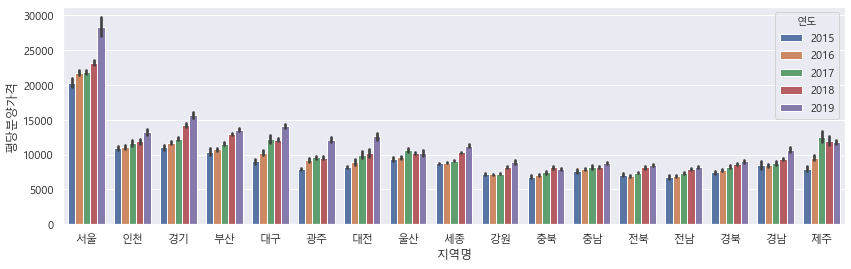

In [49]:
## Data Visualization: 1)각 지역의 연도별 평당 분양가격의 연도별 변화를 살펴보자 
sns.barplot(data=pre_sales, x='지역명', y='평당분양가격', hue='연도')

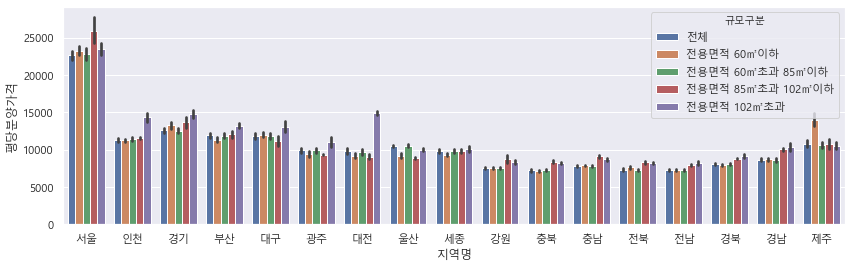

In [50]:
## Data Visualization: 2)각 지역의 규모별 평당 분양가격을 비교해 보자
sns.barplot(data=pre_sales, x='지역명', y='평당분양가격', hue='규모구분')

In [101]:
## 각 지역별 상세분석을 위한 지역별 데이터셋 생성 
pre_sales_seoul = pre_sales[pre_sales['지역명']=='서울']
pre_sales_incheon = pre_sales[pre_sales['지역명']=='인천']
pre_sales_kyunggi = pre_sales[pre_sales['지역명']=='경기']
pre_sales_busan = pre_sales[pre_sales['지역명']=='부산']
pre_sales_daegu = pre_sales[pre_sales['지역명']=='대구']
pre_sales_kwangju = pre_sales[pre_sales['지역명']=='광주']
pre_sales_daejeon = pre_sales[pre_sales['지역명']=='대전']
pre_sales_woolsan = pre_sales[pre_sales['지역명']=='울산']
pre_sales_seojong = pre_sales[pre_sales['지역명']=='울산']
pre_sales_gangwon = pre_sales[pre_sales['지역명']=='강원']
pre_sales_chungbuk = pre_sales[pre_sales['지역명']=='충북']
pre_sales_chungnam = pre_sales[pre_sales['지역명']=='충남']
pre_sales_jeonbuk = pre_sales[pre_sales['지역명']=='전북']
pre_sales_jeonnam = pre_sales[pre_sales['지역명']=='전남']
pre_sales_gyungbuk = pre_sales[pre_sales['지역명']=='경북']
pre_sales_gyungnam = pre_sales[pre_sales['지역명']=='경남']
pre_sales_jeju = pre_sales[pre_sales['지역명']=='제주']

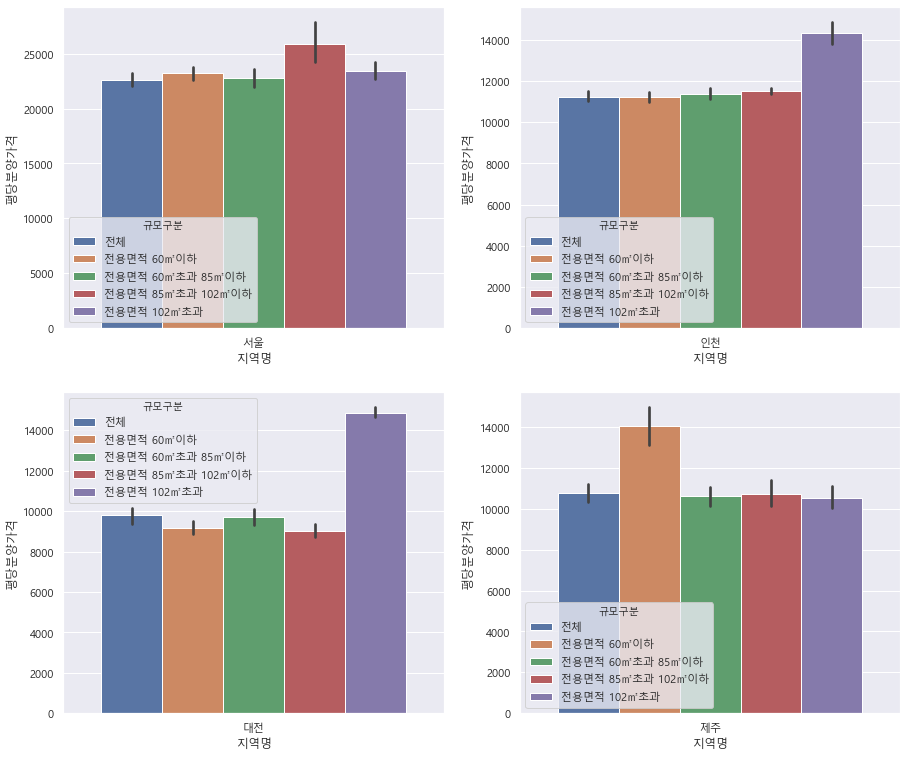

In [92]:
## 패턴이 특이한 서울, 인천, 대전, 제주만 다시한번 살펴보자 
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,13)
sns.barplot(data=pre_sales_seoul, x='지역명', y='평당분양가격', hue='규모구분', ax=ax1)
sns.barplot(data=pre_sales_incheon, x='지역명', y='평당분양가격', hue='규모구분', ax=ax2)
sns.barplot(data=pre_sales_daejeon, x='지역명', y='평당분양가격', hue='규모구분', ax=ax3)
sns.barplot(data=pre_sales_jeju, x='지역명', y='평당분양가격', hue='규모구분', ax=ax4)

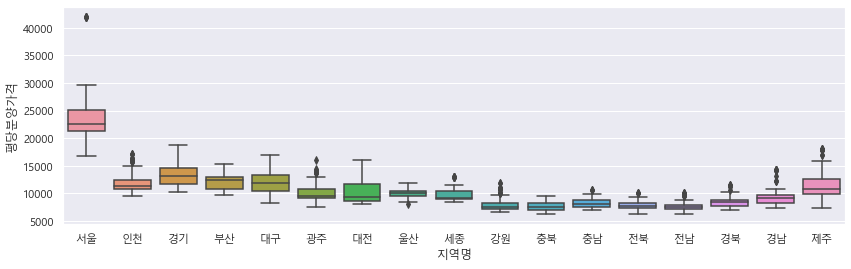

In [74]:
## 지역별 평당분양가의 산포도형태를 살펴보자 
sns.boxplot(data = pre_sales, x='지역명', y='평당분양가격')

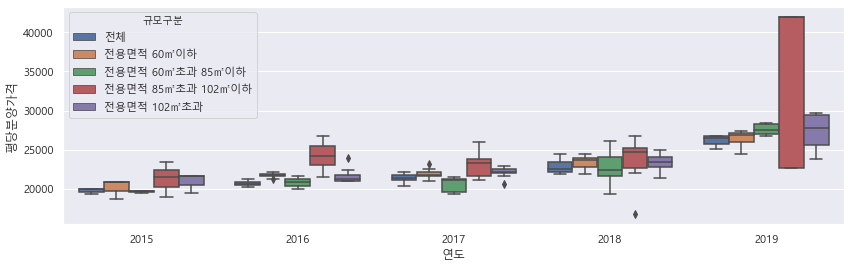

In [72]:
## 가격의 variation이 큰 서울을 좀더 자세히 보자 
sns.boxplot(data = pre_sales_seoul, x='연도', y='평당분양가격', hue='규모구분')

In [89]:
pre_sales_seoul.pivot_table('평당분양가격', index='규모구분', columns='연도')

연도,2015,2016,2017,2018,2019
규모구분,,,,,
전용면적 102㎡초과,"20,879","21,549","22,158","23,283","27,329"
전용면적 60㎡이하,"20,122","21,744","21,897","23,395","26,478"
전용면적 60㎡초과 85㎡이하,"19,593","20,788","20,635","22,756","27,587"
전용면적 85㎡초과 102㎡이하,"21,259","24,022","23,089","23,688","33,909"
전체,"19,725","20,663","21,376","22,889","26,131"


In [98]:
## 2019년 중형 평당분양가의 variation이 큰 이유가 결측치 때문은 아닌가? 
pre_sales_seoul.isnull().sum()

지역명        0
규모구분       0
연도         0
월          0
분양가격(㎡)    5
평당분양가격     5
dtype: int64

[Text(0.5, 1.0, '대구')]

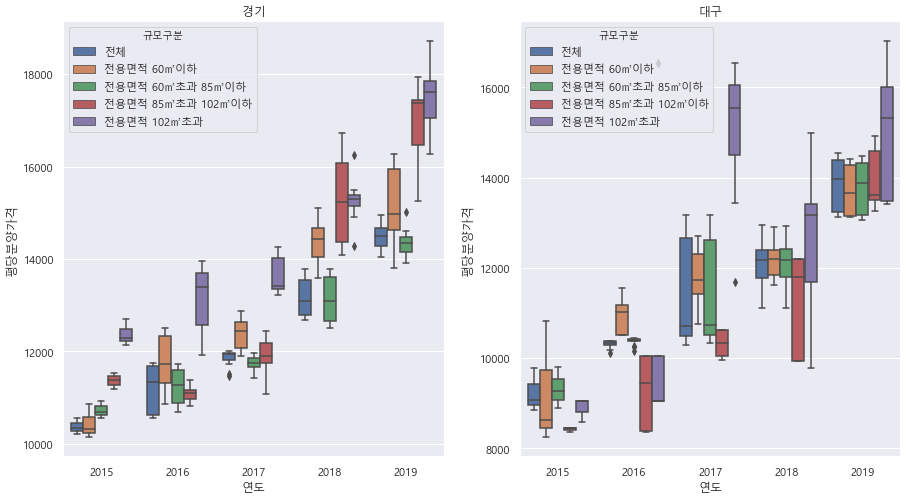

In [102]:
## 경기와 대구의 양상은 어떻게 다른가? 
figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,8)
sns.boxplot(data = pre_sales_kyunggi, x='연도', y='평당분양가격', hue='규모구분', ax=ax1)
sns.boxplot(data = pre_sales_daegu, x='연도', y='평당분양가격', hue='규모구분', ax=ax2)
ax1.set(title = '경기')
ax2.set(title = '대구')

In [103]:
print(pre_sales_kyunggi.isnull().sum())
print(pre_sales_daegu.isnull().sum())

지역명        0
규모구분       0
연도         0
월          0
분양가격(㎡)    5
평당분양가격     5
dtype: int64
지역명         0
규모구분        0
연도          0
월           0
분양가격(㎡)    13
평당분양가격     13
dtype: int64


[Text(0.5, 1.0, '대전')]

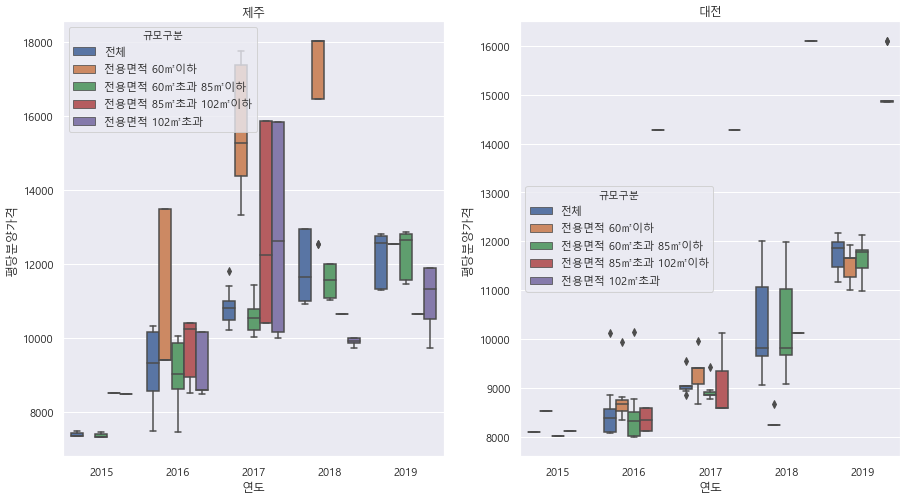

In [79]:
## 제주와 대전의 양상은 어떻게 다른가? 
figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,8)
sns.boxplot(data = pre_sales_jeju, x='연도', y='평당분양가격', hue='규모구분', ax=ax1)
sns.boxplot(data = pre_sales_daejeon, x='연도', y='평당분양가격', hue='규모구분', ax=ax2)
ax1.set(title = '제주')
ax2.set(title = '대전')

In [104]:
print(pre_sales_jeju.isnull().sum())
print(pre_sales_daejeon.isnull().sum())

지역명         0
규모구분        0
연도          0
월           0
분양가격(㎡)    36
평당분양가격     36
dtype: int64
지역명         0
규모구분        0
연도          0
월           0
분양가격(㎡)    57
평당분양가격     57
dtype: int64


##### ----------------------------------------------------------------------------------------------
##### Findings 
###### 1. 분양가는 매년 증가하는 추세이며, 특히 2019년 서울에서 큰폭으로 증가했다. 
###### 2. 서울은 중형(25~30평) 아파트의 평당 분양가가 높다.반면 인천과 대전은 대형(30평 이상), 제주는 소형(18평 이하)의 분양가가 높다. 
###### 3. 분양가의 variation(range)가 상대적으로 큰 지역은 서울, 경기, 대구, 대전, 제주이다. 
###### 4. 분양가 데이터에는 결측치가 있으며, 주요 지역별 결측치 수준은 아래와 같다. 
######     <span style="color:blue"> *지역별 샘플수는 255개로 동일하다. </span>
###### <span style="color:blue"> - 서울:  5개     / - 경기: 5개    /  - 대구: 13개  /  - 대전: 57개(22.4%) / - 제주 : 36개(14.1%)  </span>

###### 5. 서울은 2019년 매우 고가의 중형아파트가 상당수 분양된 것으로 보인다. 
###### 6. 경기는 2018~2019년 고가의 중,대형 아파트가 다수 분양된 것으로 보인다. 
###### 7. 대구는 2019년 급작스러운 분양가 상승이 있었으며, 특히 대형평수의 영향이 컷다. 
###### 8. 대전은 분양가 데이터의 결측치가 많아, 판단하기 어렵다. 
###### 9. 제주는 2016~2018년 특히 초소형 평수가 가격상승을 이끌었으나, 2019년에는 전체적으로 신규분양이 발생하지 않았던 것으로 보인다. 
######     단, 대전과 마찬가지로 분양가 데이터의 결측치가 많아 판단이 어렵다.  